# Μηχανική Μάθηση σε δεδομένα από BCI

Γιώργος Παναγόπουλος (gpanagopoulos@iit.demokritos.gr)
[CRU](http://cru.iit.demokritos.gr/)

Η τελευταία έκδοση αυτού του tutorial βρίσκετε [εδώ](https://github.com/GiorgosPanagopoulos/Demokritos-SummerLab-2016).

### Εισαγωγή 

Η βελτιστοποίηση των διεπαφών εγκεφάλου μηχανής (Brain Computer Interfaces - BCI) αποτελεί πρόκληση για πολλούς τομείς της επστήμης ,όπως η ψηφιακή επεξεργασία σήματος, η νευροεπιστήμη, η ψυχολογία κτλ. 
Λόγω της διαφορετικότητας που χαραχτηρίζει κάθε ανθρώπινο εγκέφαλο, ένα BCI καλείτε είτε να προσαρμοστεί σε έναν άνθρωπο για να παράγει αξιόπιστα αποτελέσματα η να ενιχνεύσει και να εκμεταλευτεί πρότυπα εγκεφαλικής δραστηριότητας που ισχύουν σε όλους τους ανθρώπους. Εκεί ξεκινάει ο ρόλος της Μηχανικής Μάθησης.

Ο σκοπός της παρούσας άσκησης είναι αρχικά η εξοικείωση με EEG data και πως μπορούμε να τα χειριστούμε στην python, και μετέπειτα να εξετάσουμε μεθόδους μηχανικής μάθησης με σκοπό να αναγνωρίζουμε πότε ο άνθρωπος κλείνει το δεξί και πότε το αριστερό μάτι με βάση το EEG του.

### Φόρτωση και Οπτικοποίηση των Δεδομένων
Μπορούμε να οπτικοποίησουμε τις EEG χρονοσειρές που καταγράφηκαν κατα τα πειράματα, μέσα από plots.

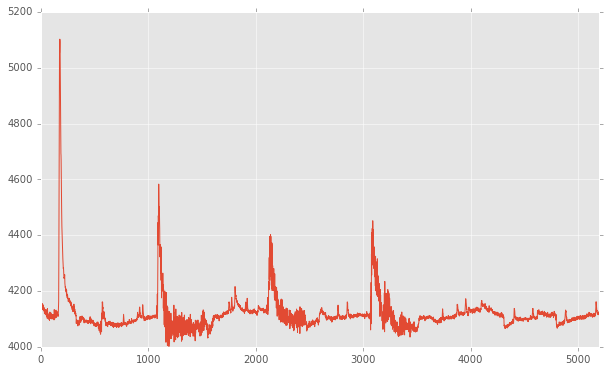

In [1]:
import os
os.chdir('C:\Users\Giwrgos\Dropbox\Summer School\Recordings')

import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt

# Load the matrix with the recordings of Subject 1 in Session 1
raw = pd.read_csv("train\Sub1_Ses1_raw.csv")
# Visualize the second column, which corresponds to the EEG recording of channel F7
ax = raw.ix[:,1].plot()

Επίσης μπορούμε να προσθέσουμε παραπάνω από ένα EEG κανάλι στο plot μας και να τραβήξουμε καθέτους που να δείχνουν πότε ο άνθρωπος έκλεισε το αριστερό μάτι και πότε το δεξί.

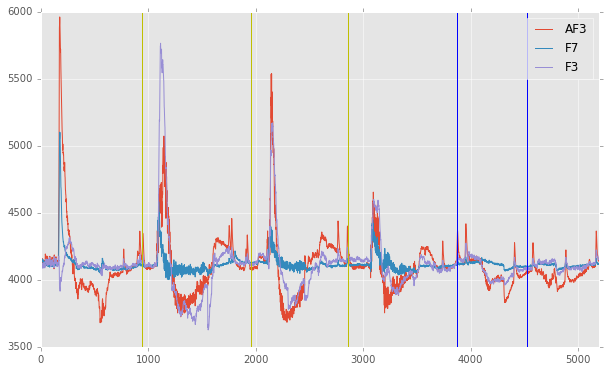

In [3]:
#Visualize the three channels together 
ax = raw.ix[:,0:3].plot()

# Read the time series events (-1 for closing left eye , 1 for right eye)
events = pd.read_csv("train\Sub1_Ses1_events.csv",header = None )

# Find when the left events happen (at what sample)
left_events_idx = list(events.ix[events.ix[:,0]<0].index)
# Add them in the EEG plot
for e in left_events_idx:
    ax.axvline(x=e, color='b')

# Do the same for right events
right_events_idx = list(events.ix[events.ix[:,0]>0].index)
for e in right_events_idx:
    ax.axvline(x=e, color='y')

Το describe() είναι επίσης ένας εύκολος τρόπος να βγάλουμε κάποια summary stats για κάθε μεταβλητή του dataset μας, δηλαδή για κάθε κανάλι σε αυτήν την περίπτωση. 

In [15]:
raw.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,FC6,F4,F8,AF4
count,5192.000000,5192.00000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000
mean,4105.684089,4117.83276,4113.557939,4041.407689,4108.184781,4116.456482,4119.115700,4118.216685,4123.307159,4122.967781,4057.691320,4124.745268
std,228.003174,71.46573,216.604324,882.555333,218.875956,85.693514,70.964662,79.040116,141.161344,82.361656,296.033814,154.329411
min,3679.487200,4001.53850,3626.153800,1972.307700,3069.743600,3743.589700,3864.102600,3684.102600,3319.487200,3677.948700,2663.589700,2918.974400
25%,3989.230800,4090.25640,4055.897400,3564.358975,4027.179500,4078.461500,4091.282100,4089.743600,4074.871800,4091.282100,3959.487200,4083.076900
50%,4088.717900,4107.17950,4109.230800,3915.897400,4096.923100,4112.820500,4118.461500,4118.461500,4125.641000,4126.666700,4107.692300,4131.794900
75%,4167.820500,4124.61540,4148.717900,4214.871800,4159.487200,4143.076900,4142.051300,4143.717925,4182.051300,4157.948700,4198.974400,4177.051300
max,5963.076900,5102.56410,5766.666700,7607.692300,5103.076900,4495.384600,4532.820500,4464.615400,4639.487200,4456.410300,6112.307700,5083.076900


Αν παρατηρήσουμε "ύποπτες" τιμές, μπορούμε να χρησιμοποιήσουμε boxplots για να δούμε με μεγαλύτερη λεπτομέρεια πως κατανέμονται οι τιμές για αυτό το κανάλι.

C:\Users\Giwrgos\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xa12b320>],
 'caps': [<matplotlib.lines.Line2D at 0xa29d1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0xa2ab278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa29dcc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x3842ba8>,
  <matplotlib.lines.Line2D at 0xa12bc18>]}

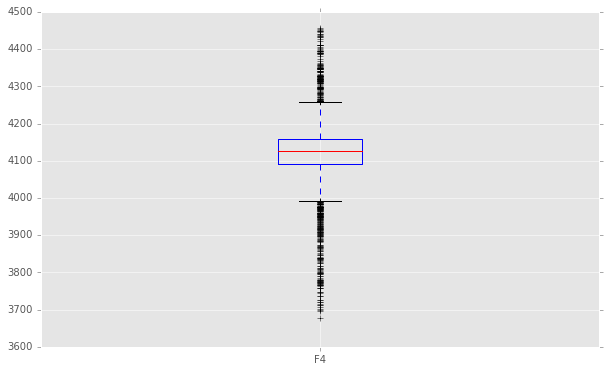

In [3]:
raw.boxplot(column='F4')

### Εξαγωγή Χαραχτηριστικών του Σήματος

Για να πετύχει σωστή αναγνώριση προτύπων ένας αλγόριθμος χρησιμοποιεί δεδομένα που αντιστοιχούν στις περιπτώσεις που θέλουμε να "μάθει". Στην προκειμένη, οι εισόδοι μας στον αλγόριθμο είναι το EEG και η έξοδος είναι το αν ο άνθρωπος έκλεισε το αριστερό η το δεξί του μάτι. Συνεπώς πρέπει να εξάγουμε τα EEG σήματα από κάθε trial.

Είναι σημαντικό να παρατηρήσουμε πως το μήκος ανάμεσα σε δύο κινήσεις ματιών δεν είναι ίδιο. Αυτό συμβαίνει λογω του μεταβαλλόμενου ρυθμού δειγματοληψίας που έχει το EPOC+ και σημαίνει πως δεν μπορούμε να χρησιμοποιήσουμε το σήμα αυτό κάθε αυτό ως είσοδο στον αλγόριθμό μας, αφού τα παραδείγματα στα οποία βασίζεται ο αλγόριθμος πρέπει να έχουν ίδιο μέγεθος.

Αντί του σήματος σαν είσοδο στον αλγόριθμο, θα εισάγουμε τις παρακάτω απλές μετρικές που θα εξάγουμε από το σήμα, ώστε να αποτυπώσουμε όσο το δυνατόν καλύτερα την συμπεριφορά του.

* Μέση τιμή σήματος
* Διακύμανση

In [4]:
import numpy as np

def extract_features(eeg):
    # Define metrics extracted be the EEG signal
    return [np.mean(eeg),np.std(eeg)]

def construct_dataset(raw,events):    
    # Find the samples where events happened (both left and right)
    events_idx = list(events.ix[events.ix[:,0]<>0].index)
    events_idx.append(max(raw.index))
    
    # Construct the header of the dataset we will use for machine learning 
    # e.g. Channel1_feature1, Channel1_feature2 ... Channel2_feature1, Channel2_feature1
    column_names = []
    for channel in raw:
        column_names.extend([
            channel+'_Mean',
            channel+'_Std'])
    
    # Initiate the dataset (with blank values)
    data = pd.DataFrame(index=range(0,len(events_idx)-1),columns = column_names)

    # Iterate through the events and extract from the EEG signal on the respective samples
    # the features defined in function extract_features. 
    # Add them in the respective row in the dataset (one row for each event)
    for e in range(1,len(events_idx)):
        features = raw.ix[range(events_idx[e-1],events_idx[e]-1),:].apply(extract_features)
        data.ix[e-1,:] = [feature for channel in features for feature in channel]
    
    data = data.convert_objects(convert_numeric=True)
    
    # Define the class of the events (-1 for left, 1 for right)
    data['class'] = np.array(events.ix[events_idx[0:(len(events_idx)-1)]],dtype=float)

    return(data)

# Derive the dataset based on the loaded raw recordings and the events
data = construct_dataset(raw,events)

C:\Users\Giwrgos\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Έτσι πετυχαίνουμε ένα είδος μείωσης των διαστάσεων και της πληροφορίας που εισάγουμε στον αλγόριθμο μηχανικής μάθησης, κάτι που είναι γενικά επιθυμητό. 

Θέλοντας να αξιοποιήσουμε όλα τα session από όλους τους συμμετέχοντες στο πείραμα, τα φορτώνουμε και τα επεξεργαζόμαστε με παρόμοιο τρόπο ώστε να καταλήξουμε σε ένα dataset που είναι η ένωση και των 5.

Αξίζει να σημειωθεί ότι λόγω της υψηλής διακύμανσης που συναντάται στην εγκεφαλική δραστηριότητα από άνθρωπο σε άνθρωπο, συνήθως δημιουργούνται εξατομικευμένα μοντέλα μηχανικής μάθησης για κάθε συμμετέχοντα. Λόγω απλότητας σε αυτό το tutorial, θα χρησιμοποιήσουμε μόνο ένα μοντέλο για όλους τους συμμετέχοντες. Η προσέγγιση αυτή ονομάζεται pooled analysis. 

In [5]:
# Append to the dataset the recordings from all subjects and all sessions, using construct_dataset
for sub in range(1,6):
    for ses in range(1,5):
        if sub==1 and ses==1: # recordings from sub 1 ses 1 are allready stored in data
            continue
        raw = pd.read_csv('train\Sub'+str(sub)+'_Ses'+str(ses) +'_raw.csv')    
        events = pd.read_csv('train\Sub'+str(sub)+'_Ses'+str(ses)+'_events.csv',header = None )
        train_sub = construct_dataset(raw,events)
        data = data.append(train_sub,ignore_index=True)

# Make class 0 for left and 1 for right
data['class'] = (data['class']+1)/2

data.to_csv('bci_dataset.csv',index=False)

C:\Users\Giwrgos\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


### Διερευνητική Ανάλυση

Το λεγόμενο Exploratory Data Analysis είναι ίσως η πιο βασική τεχνική που ακολουθούν οι επιστήμονες και οι data scientists για να καταλάβουν τα δεδομένα τους και να βγάλουν συμπεράσματα.

Επειδή ο σκοπός της ανάλυσης μας είναι η καλύτερη πρόβλεψη της κλάσης, μπορούμε να εξερευνήσουμε την διαφορά που έχουν τα feature ως προς τις δύο κλάσεις. Σε περιπτώσεις που ένα feature έχει πολύ όμοια συμπεριφορά και στις δύο κλάσεις, μια απλή προσσέγγιση είναι να το αφαιρέσουμε από την διαδικασία, αφού πιθανόν να μην βοηθήσει τον αλγόριθμο μας να ξεχωρίσει τις κλάσεις. 

Στα παραδείγματα παρακάτω, χρησιμοποιούμε boxplot και probability densities για να ανιχνεύσουμε ποια feature δεν εχουν αισθητές διαφορές από την μια κλάση στην άλλη.

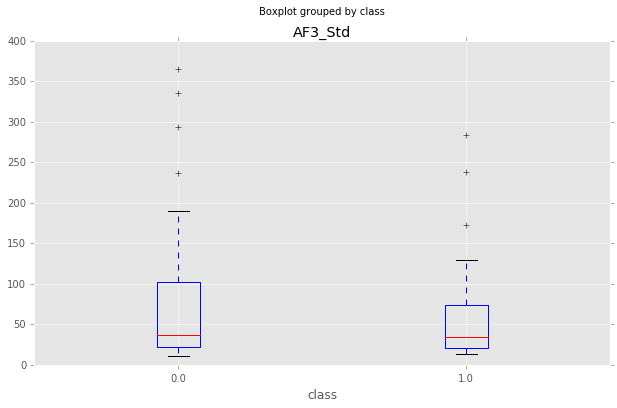

In [6]:
data.boxplot(column='AF3_Std',by='class')

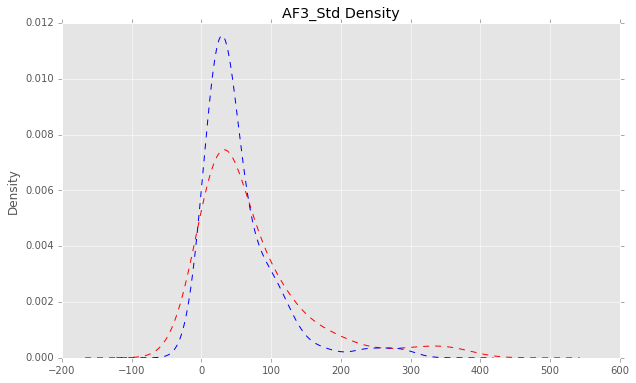

In [7]:
data_right = data.ix[data['class']>0.5,0:data.shape[1]-1]
data_left = data.ix[data['class']<0.5,0:data.shape[1]-1]

data_left['AF3_Std'].plot(kind='density',style='r--')
data_right['AF3_Std'].plot(kind='density',style='b--')
plt.title('AF3_Std Density')

### Εφαρμογή Νευρωνικού Δικτύου

Για να φτιάξουμε το μοντέλο μηχανικής μάθησης που θα προβλέπει πότε κάποιος κλέινει το αριστερό η δεξί μάτι, θα χρησιμοποιήσουμε την βιβλιοθήκη [Keras](http://keras.io/), που χρησιμοποιείται συχνά για εφαρμογές deep learning.

Θα δουλέψουμε με αρχιτεκτονικές ενός κρυμμένου επιπέδο, ενώ θα πειραματιστούμε με τον αριθμό κόμβων, ώστε να βρούμε τον βέλτιστο. Για να συγκρίνουμε την απόδοση του μοντέλου μας σε σχέση με τον αριθμό των κόμβων, θα τρέξουμε πειράματα και θα σχεδιάσουμε την απόδοση του κάθε μοντέλου, με βάση την ακρίβεια και το mean squared error του. 

Λόγω της σιγμοειδούς συνάρτησης που χρησιμοποιούμε σαν activation function στο νευρωνικό, πρέπει επίσης να "ομαλοποιήσουμε" τα δεδομένα μας και να μετατρέψουμε την κλάση στο διάστημα (0,1).

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#Normalize data for input in Neural Net
data_normed = (data - data.mean()) / (data.max() - data.min())
data_normed['class']+=0.5

data_normed.to_csv('bci_dataset_normed.csv',index=False)

# Lists that will keep loss and accuracy for all Neural Network Architectures we examine
loss_history = []
acc_history = []

n_features = data_normed.shape[1]-1
n_rows = data_normed.shape[0]

# From pandas data frame to numpy array
train = np.array(data_normed.ix[:,0:n_features])
Y = np.array(data_normed.ix[:,n_features])

for n_nodes in range(1,10):
    print 'nodes used :'+str(n_nodes)
    
    # Define architecture of the model
    model = Sequential([
        Dense(n_nodes, input_dim = data_normed.shape[1]-1,activation='tanh'),
        Dense(1,activation='tanh')
        ])
    
    # Define optimization of the model
    model.compile(loss = 'mse', 
              optimizer = SGD(lr = 0.1),
              metrics = ['accuracy'])
    
    # Fit the model to the data
    result = model.fit(train, Y,
              nb_epoch = 100,
              batch_size = n_rows)
    
    # Keep the resulted train accuracy and train loss
    acc = result.history['acc'][-1]
    loss = result.history['loss'][-1]
    
    print 'loss: '+ str(loss)
    loss_history.append(loss)
    print 'accuracy: '+ str(acc)
    acc_history.append(acc)

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


nodes used :1
Epoch 1/100
120/120 [==============================] - 0s - loss: 0.5253 - acc: 0.5000
Epoch 2/100
120/120 [==============================] - 0s - loss: 0.4121 - acc: 0.5000
Epoch 3/100
120/120 [==============================] - 0s - loss: 0.3510 - acc: 0.5000
Epoch 4/100
120/120 [==============================] - 0s - loss: 0.3174 - acc: 0.5000
Epoch 5/100
120/120 [==============================] - 0s - loss: 0.2980 - acc: 0.5000
Epoch 6/100
120/120 [==============================] - 0s - loss: 0.2863 - acc: 0.5000
Epoch 7/100
120/120 [==============================] - 0s - loss: 0.2788 - acc: 0.5083
Epoch 8/100
120/120 [==============================] - 0s - loss: 0.2738 - acc: 0.5167
Epoch 9/100
120/120 [==============================] - 0s - loss: 0.2704 - acc: 0.5000
Epoch 10/100
120/120 [==============================] - 0s - loss: 0.2680 - acc: 0.4583
Epoch 11/100
120/120 [==============================] - 0s - loss: 0.2662 - acc: 0.4833
Epoch 12/100
120/120 [=====

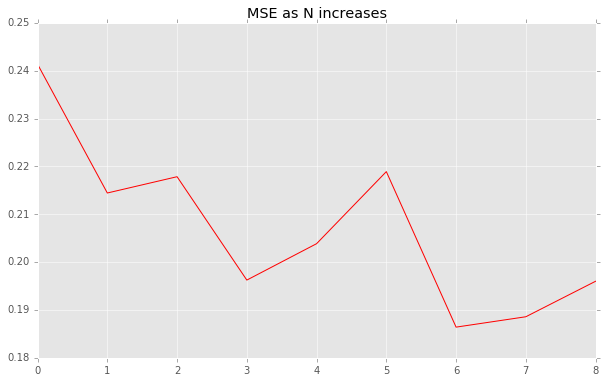

In [9]:
plt.plot(loss_history,color='r')
plt.title('MSE as N increases')

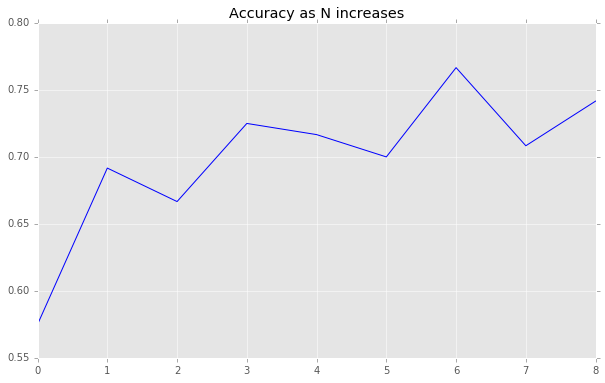

In [10]:
plt.plot(acc_history,color='b')
plt.title('Accuracy as N increases')

### Αξιολόγηση Ικανότητας Γενίκευσης

Ενας αλγόριθμος μηχανικής μάθησης αξιολογείται ουσιαστικά με βάση την ικανότητα πρόβλεψης σε δεδομένα που δεν έχει εκπαιδευτεί. Έτσι υπολογίζεται το πόσο καλά έχει μάθει τους πραγματικούς "κανόνες" που διέπουν τα δεδομένα, και όχι μόνο τις περιπτώσεις στις οποίες έχει εκπαιδευτεί. Η κατανόηση εναντίον της παπαγαλίας! 

Για να γίνει αυτό, το τελικό μοντέλο δημιουργεί προβλέψεις για δεδομένα τα οποία δεν έχει ξαναδεί. Πριν όμως δημιουργηθεί το τελικό μοντέλο, πρέπει να υπάρχει ένας τρόπος να αξιολογήσουμε την ικανότητα γενίκευσης του αλγορίθμου, αφού η αποδόση του στα δεδομένα εκπαίδευσης δεν είναι πάντα αξιόπιστο κριτήριο. Προκειμένου λοιπόν να προσομειώσουμε το test των "unseen data", χωρίζουμε το αρχικό μας dataset σε δύο μέρη, ένα στο οποίο θα εκαπιδευτεί ο αλγόριθμος (train set) και ένα που θα παίξει το ρόλο του test set. Επειτα ορίζουμε το μοντέλο με τις παραμέτρους που πιστεύουμε ότι είναι οι βέλτιστές, το εκπαιδεύουμε στο train και το αξιολογούμε με το test set.

Λογικά, η απόδοση του μοντέλου στο test set, είναι χειρότερη απ' ότι στο train.

In [12]:
from sklearn.cross_validation import train_test_split

# Split the dataset with a ratio of 0.8 - 0.2 (train - simulated test)
train, test = train_test_split(data_normed, test_size = 0.2)
train = np.array(train)
test = np.array(test)

# Set the architecture you believe as optimum
n_nodes_optimum = 5

model = Sequential([
        Dense(n_nodes_optimum, input_dim = data_normed.shape[1]-1,activation='tanh'),
        Dense(1,activation='tanh')
        ])
    
model.compile(loss = 'mse', 
              optimizer = SGD(lr = 0.1),
              metrics = ['accuracy'])

# Last column corresponds to the class, the rest are teh features
model.fit(train[:,0:n_features],
          train[:,n_features],
          nb_epoch=100,
          batch_size = n_rows)

# See the model's performance in the test set
score = model.evaluate( test[:,0:n_features] , test[:,n_features] , batch_size=n_rows)

print 'loss: '+str(score[0])
print 'acc: '+str(score[1])

Epoch 1/100
96/96 [==============================] - 0s - loss: 0.5708 - acc: 0.5000
Epoch 2/100
96/96 [==============================] - 0s - loss: 0.3778 - acc: 0.4688
Epoch 3/100
96/96 [==============================] - 0s - loss: 0.3282 - acc: 0.4792
Epoch 4/100
96/96 [==============================] - 0s - loss: 0.3108 - acc: 0.4688
Epoch 5/100
96/96 [==============================] - 0s - loss: 0.3027 - acc: 0.4062
Epoch 6/100
96/96 [==============================] - 0s - loss: 0.2980 - acc: 0.3854
Epoch 7/100
96/96 [==============================] - 0s - loss: 0.2947 - acc: 0.3646
Epoch 8/100
96/96 [==============================] - 0s - loss: 0.2921 - acc: 0.3750
Epoch 9/100
96/96 [==============================] - 0s - loss: 0.2899 - acc: 0.3646
Epoch 10/100
96/96 [==============================] - 0s - loss: 0.2879 - acc: 0.3542
Epoch 11/100
96/96 [==============================] - 0s - loss: 0.2860 - acc: 0.3438
Epoch 12/100
96/96 [==============================] - 0s - loss

### Πρόβλεψη σε Άγνωστα Δεδομένα

Στην τελική φάση της διαδικασίας, εκπαιδεύουμε τον αλγόριθμο με την αρχιτεκτονική που διαλέξαμε.

In [14]:
# Train the final model
n_nodes_optimum = 6

train = np.array(data_normed.ix[:,0:n_features])
Y = np.array(data_normed.ix[:,n_features])

model = Sequential([
        Dense(n_nodes_optimum, input_dim = data_normed.shape[1]-1,activation='tanh'),
        Dense(1,activation='tanh')
        ])
    
model.compile(loss = 'mse', 
              optimizer = SGD(lr = 0.1),
              metrics = ['accuracy'])

# Last column corresponds to the class, the rest are the features
model.fit(train,
          Y,
          nb_epoch=100,
          batch_size = n_rows)

Epoch 1/100
120/120 [==============================] - 0s - loss: 0.5286 - acc: 0.5083
Epoch 2/100
120/120 [==============================] - 0s - loss: 0.3435 - acc: 0.4917
Epoch 3/100
120/120 [==============================] - 0s - loss: 0.2864 - acc: 0.5000
Epoch 4/100
120/120 [==============================] - 0s - loss: 0.2666 - acc: 0.4833
Epoch 5/100
120/120 [==============================] - 0s - loss: 0.2583 - acc: 0.4750
Epoch 6/100
120/120 [==============================] - 0s - loss: 0.2542 - acc: 0.4917
Epoch 7/100
120/120 [==============================] - 0s - loss: 0.2519 - acc: 0.5083
Epoch 8/100
120/120 [==============================] - 0s - loss: 0.2503 - acc: 0.5083
Epoch 9/100
120/120 [==============================] - 0s - loss: 0.2491 - acc: 0.5167
Epoch 10/100
120/120 [==============================] - 0s - loss: 0.2482 - acc: 0.5500
Epoch 11/100
120/120 [==============================] - 0s - loss: 0.2473 - acc: 0.5583
Epoch 12/100
120/120 [===================

Μπορείτε να σώσετε το μοντέλο με το καλύτερο accuracy για επαναχρησιμοποίηση, αφού η εκπαίδευση με τις ίδιες παραμέτρους δεν σημαίνει απαραίτητα ότι θα βγάλει και το ίδιο ακριβώς μοντέλο. 

In [6]:
from keras.models import model_from_json
#save...
json_string = model.to_json()
open('best_architecture.json', 'w').write(json_string)
model.save_weights('best_weights.h5')

#...and reload
model = model_from_json(open('best_architecture.json').read())
model.load_weights('best_weights.h5')

Δημιουργούμε το test data χρησιμοποιώντας το session 5 όλων των subject. Η προεπεξεργασία που κάνουμε στο test data πριν το δώσουμε στο εκπαιδευμένο νευρωνικό, πρέπει να είναι ακριβώς η ίδια που κάναμε και στο train πριν το βάλουμε για εκπαίδευση, καθώς το νευρωνικό καλείτε να αντιστοιχίσει samples από το ένα dataset, με samples από το άλλο.

In [40]:
# Load the events and raw recordings for the test sessions, the same way as for the train ones
raw = pd.read_csv('test\Sub1_Ses5_raw.csv')    
events = pd.read_csv('test\Sub1_Ses5_events.csv',header=None)
test = construct_dataset(raw,events)

for sub in range(2,6):
    raw = pd.read_csv('test\Sub'+str(sub)+'_Ses5_raw.csv')    
    events = pd.read_csv('test\Sub'+str(sub)+'_Ses5_events.csv',header = None )
    test_sub = construct_dataset(raw,events)
    test = test.append(test_sub,ignore_index=True)
    
# Normalize test set and change class, as in the train set
test['class'] = (test['class']+1)/2
test_normed = (test - test.mean()) / (test.max() - test.min())

# Keep the test class separated for evaluation (+ 0.5 because class should be 0 for left and 1 for right)
test_class = pd.Series(test_normed['class']+0.5)
test_normed = np.array(test_normed.drop('class',1))

C:\Users\Giwrgos\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Τέλος, ζητάμε από το εκπαιδευμένο μοντέλο μας να κατατάξει σε κλάσεις κάθε sample του test set, και χρησιμοποιούμε την λίστα με την πραγματικη κλάση του κάθε sample για να αξιολογήσουμε το ποσοστό της κατάταξης που ήταν επιτυχημένο.

In [53]:
# Create and store predictions
classification = model.predict_classes(test_normed)]
classification =  pd.Series([float(clas) for clas in classification)
pd.DataFrame(classification).to_csv('bci_classification.csv',index=False)

# Calculate the percentage of samples that our model predicted right
accuracy = sum(classification == test_class)/float(len(test_class))

print "Accuracy in the test set is :"+str(accuracy)

# See the differences sample by sample
pd.DataFrame(dict(Classification = classification,Real = test_class))

30/30 [==============================] - 0s
Accuracy in the test set is :0.566666666667


,Predictions,Real
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,0
9,1,1
